<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF-280 - Estadística Computacional </h1>
    <h2> Distribuciones Muestrales e Intervalos de Confianza </h2>
    <h4> Ignacio Cea Ruiz </h4>
</center>

## Introducción
Los laboratorios de estadística computacional (LEC) tienen por objetivo principal analizar datos utilizando técnicas de visualización y evidenciar el comportamiento estocástico de experimentos aleatorios mediante simulaciones computacionales. Las experiencias buscan medir la habilidad de programación en Python y sus librerías, la capacidad de análisis estadístico y la comprensión de documentaciones, artículos y papers.

> Recuerde que los laboratorios tienen una ponderación de 25% en la nota final del ramo y que, además, el promedio de estos debe ser mayor o igual a 55 para aprobar el ramo

## Reglamento
1. El desarrollo de los laboratorios debe ser en **Python**.
2. El formato de entrega es un **archivo .ipynb**, es decir, un Jupyter Notebook.
3. El nombre del archivo de entrega del laboratorio *i* debe seguir el siguiente formato: *lec-i-nombregrupo.ipynb*.
4. Se recomienda seguir las recomendaciones de estilo descritas en [PEP 8](https://www.python.org/dev/peps/pep-0008/) y [Type hints](https://docs.python.org/3/library/typing.html) a la hora de programar.
5. El tiempo para la realización de los laboratorios es extenso, por lo que solo se recibirán entregas hasta las 23:59 del día de entrega **a menos que se especifique lo contrario**. Entregas fuera del plazo serán calificadas con nota 0.
6. Antes de entregar su laboratorio verifique su **reproducibilidad**. Jupyter Notebooks con errores a la hora de ejecutarse serán penalizados con descuentos.
7. Solo un integrante por grupo debe realizar la entrega por Aula.
8. El código entregado es solo una guía, se puede modificar sin problemas. Así mismo, para cada ejercicio usted puede crear las funciones que estime conveniente. También puede agregar celdas de markdown para explicar y comentar según corresponda.

## Toolbox

La caja de herramientas (stack de tecnologias) para el presente laboratorio está conformada por:
1. [Python](https://www.python.org/doc/).
2. [Numpy](https://numpy.org/doc/stable/).
3. [Scipy](https://docs.scipy.org/doc/scipy/reference/index.html)
4. [Matplotlib](https://matplotlib.org/stable/contents.html).

Usted es libre de utilizar el entorno de desarrollo que prefiera, sin embargo se recomienda el uso de [Anaconda](https://www.anaconda.com/products/individual#Downloads), ya que incluye las herramientas necesarias para desarrollar los laboratorios, permite una rápida instalación de otras librerías y es compatible con una gran variedad de sistemas operativos.

Usted también es libre de usar tanto Jupyer Notebook (incluido en la instalación individual de Anaconda) como otras alternativas de desarrollo de archivos `.ipynb` tales como [Colab](https://colab.research.google.com/) o [Visual Studio Code](https://code.visualstudio.com/). En el caso de trabajar remotamente se recomienda utilizar Git para trabajar de manera exitosa y ordenada en equipo.

Las librerías se introducirán amigablemente, no se asume ningún tipo de conocimiento previo en las tecnologías presentes en nuestra toolbox salvo por Python, sin embargo, se busca promover la lectura de documentaciones de librerías.

## Experiencia



### 0. Importación de las librerías y funciones útiles

A continuación se importan las librerías que necesitaremos para el correcto desarrollo de esta experiencia. Se recomienda utilizar los aliases por defecto.

In [1]:
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

### 1. Teorema del Límite Central **(25 pts.)**

El **Teorema del Límite Central** provee un resultado muy interesante para el análisis probabilístico. En palabras simples plantea que, si la variable aleatoria $S_n$ es la suma de $n$ variables aleatorias **independientes** con **media y varianza conocidas** (todas con la misma media y varianza), entonces la distribución de probabilidad de $S_n$ se *aproxima* a una **distribución normal** cuando $n$ tiende a infinito.

Así, si realizamos un experimento cuyo resultado posible se modela con una variable aleatoria con cualquier distribución de probabilidad y, luego, repetimos este experimento muchas veces, podemos asegurar que la suma de dichos resultados se comportará como una distribución normal con media y varianza dadas.

Formalizando: Sean $X_1, X_2, ..., X_n$ variables aleatorias **independientes e idénticamente distribuidas** (propiedad abreviada como *iid*), donde $\text{E}[X_i]=\mu$ y $\text{V}[X_i]=\sigma^2$. Además, definimos $S_n=\sum_{i=1}^nX_i$. Luego:

$$
\begin{equation*}
S_n\sim\text{N}(n\mu, n\sigma^2)
\end{equation*}
$$


Estandarizando, obtenemos la variable aleatoria $Z_n$:
$$
\begin{equation*}
Z_n :=\frac{S_n-n\mu}{\sigma\sqrt{n}}
\end{equation*}
$$

Entonces, la función de distribución de $Z_n$ converge hacia la función de **distribución normal estándar** cuando $n\to\infty$.



* Elija su variable aleatoria $X$ favorita, puede cambiar los parámetros a gusto:

In [2]:
def get_random_variable(option: int):
    if option == 1:
        return sp.beta(5, 2)
    elif option == 2:
        return sp.expon(scale=1/10)
    elif option == 3:
        return sp.f(25, 30)
    elif option == 4:
        return sp.gamma(10)
    elif option == 5:
        return sp.t(30)
    else:
        raise ValueError("Debe elegir una opcion entre 1 y 5")

In [3]:
X = get_random_variable(1)
mean = X.mean()
std_dev = X.std()
print(mean,std_dev)

0.7142857142857143 0.15971914124998499


**1.1)** Con la variable aleatoria elegida, generaremos un conjunto de 1000 muestras para cada uno de los siguientes valores de $n$ (es decir, cantidades de muestras aleatorias a sumar): 10, 100, 1000, 10000. Luego, compararemos estos datos con la distribución normal estándar. Para esto, primero tendremos que estandarizar cada valor de $S_n$ utilizando la fórmula de presentada anteriormente. Compare generando 4 histogramas para los mil valores de $S_n$, agregando la función de masa probabilidad de la normal estándar para comparar. **(10 pts.)**

In [4]:
X.rvs(size=10)

array([0.59713197, 0.7518405 , 0.56238816, 0.83511648, 0.4136542 ,
       0.85343286, 0.50064991, 0.80133256, 0.94151443, 0.70590466])

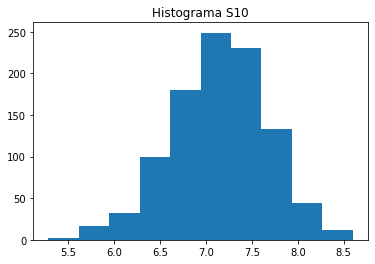

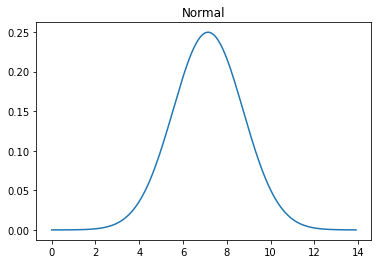

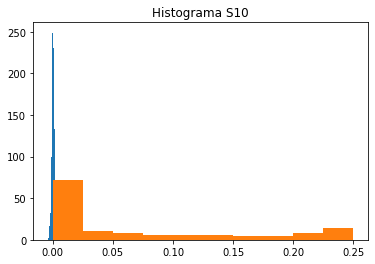

In [5]:
#MUESTRAS
s10=[sum(X.rvs(size=10)) for i in range(1000)]
#Estandarización
#ESTANDARIZACION
def estandarizacion(muestra:list,esperanza:float,desviacionestandar:float,n:int)->list:
    muestraaux=[]
    for x in range(len(muestra)):
        tmpvalue=(muestra[x]-(n*esperanza))/(desviacionestandar*np.sqrt(n))
        muestraaux.append(tmpvalue)
    return muestraaux

s10stdr=estandarizacion(s10,mean,std_dev,10)

#HISTOGRAMAS
plt.title("Histograma S10")
plt.hist(s10,label="S10")
#normal = sp.norm.pdf(x_axis, 0, 1)
#plt.plot(x_axis, normal)
#plt.plot(ns10)
plt.show()

#HISTOGRAMAS
plt.title("Normal")
x_axis = np.arange(0,14, 0.1)
normal = sp.norm.pdf(x_axis,10*mean, 10*std_dev)
plt.plot(x_axis, normal)
plt.show()

dividir = lambda x:x/1000
#HISTOGRAMA ESTANDAR
plt.title("Histograma S10")
plt.hist(list(map(dividir, s10stdr)),label="S10")
plt.hist(sp.norm.pdf(x_axis,10*mean, 10*std_dev))
plt.show()

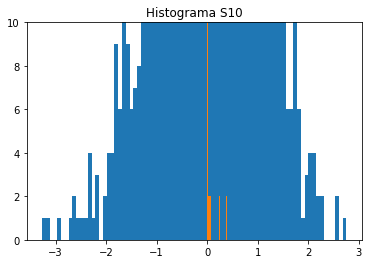

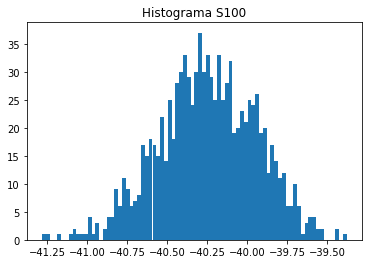

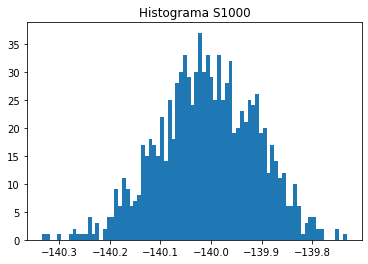

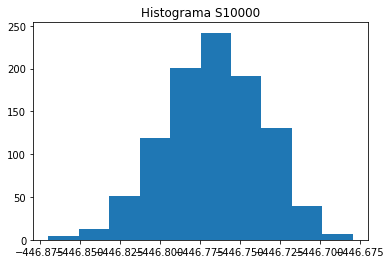

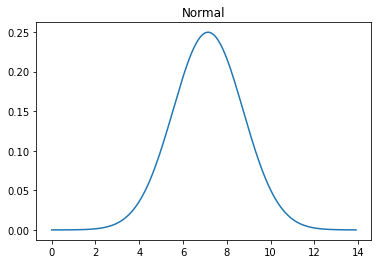

In [6]:
#MUESTRAS
s10=[sum(X.rvs(size=10)) for i in range(1000)]
s100=[sum(X.rvs(size=100))for i in range(1000)]
s1000=[sum(X.rvs(size=1000))for i in range(1000)]
s10000=[sum(X.rvs(size=10000))for i in range(1000)]

#ESTANDARIZACION
def estandarizacion(muestra:list,esperanza:float,desviacionestandar:float,n:int)->list:
    muestraaux=[]
    for x in range(len(muestra)):
        tmpvalue=(muestra[x]-(n*esperanza))/(desviacionestandar*np.sqrt(n))
        muestraaux.append(tmpvalue)
    return muestraaux
#ZN
s10stdr=estandarizacion(s10,mean,std_dev,10)
s100stdr=estandarizacion(s10,mean,std_dev,100)
s1000stdr=estandarizacion(s10,mean,std_dev,1000)
s10000stdr=estandarizacion(s10,mean,std_dev,10000)

#Normal Estandar
x_axis = np.arange(-10,10, 0.1)
#FALTA GENERAR LA NORMAL Y FUNCION DE MASA#

#HISTOGRAMAS
plt.title("Histograma S10")
x_axis = np.arange(-20,20, 0.1)
normal = sp.norm.pdf(x_axis,0, 1)
#plt.plot(x_axis, normal)
plt.hist(s10stdr,bins=80,label="S10")
plt.hist(normal,bins=60,label="Normal")
plt.ylim(0,10)
plt.show()

plt.title("Histograma S100")
x_axis = np.arange(-50,50, 0.1)
normal = sp.norm.pdf(x_axis,0, 1)
plt.hist(s100stdr,bins=80,label="S100")
#plt.hist(normal,bins=60,label="Normal")
#plt.ylim(0,100)
plt.show()

plt.title("Histograma S1000")
plt.hist(s1000stdr,bins=80,label="S1000")
plt.show()

plt.title("Histograma S10000")
plt.hist(s10000stdr);
plt.show()

plt.title("Normal")
x_axis = np.arange(0,14, 0.1)
normal = sp.norm.pdf(x_axis,10*mean, 10*std_dev)
plt.plot(x_axis, normal)
plt.show()


**1.2)** Los *qq-plots* sirven para visualizar qué tan bien se ajusta un conjunto de datos a una distribución en específico. Construya un *qqplot* normal para cada uno de los conjuntos $Z_n$ obtenidos en la pregunta anterior utilizando la función `qqplot` de la librería `statsmodels.graphics.gofplots` (4 gráficos en total). Explique brevemente cómo funcionan este tipo de gráficos. **(8 pts.)**

In [7]:
from statsmodels.graphics.gofplots import qqplot

fig = qqplot(np.array(s10stdr))
plt.show()

fig = qqplot(np.array(s100stdr))
plt.show()

fig = qqplot(np.array(s1000stdr))
plt.show()

fig = qqplot(np.array(s10000stdr))
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

* En el curso INF-280, 40 estudiantes rindieron un control. Después de varios semestres de experiencia, el ayudante sabe que el tiempo que necesita para revisar un control elegido al azar es una variable aleatoria con una media $\mu=10$ minutos y desviación estándar $\sigma=6$ minutos.

**1.3)** Si los tiempos que requiere revisar cada control son independientes entre sí y el ayudante comienza a revisarlos a las 18:00 horas, ¿cuál es la probabilidad de que termine su trabajo antes de que sus amigos se conecten a jugar Minecraft a las 23:30 horas? **(7 pts.)**

In [8]:

n = 40 
mu = 10 
sigma2 = np.power(6,2) 
#tranformacion de horas a minutos
T_init = 1080 # 18:00 horas
T_final = 1410 #23:30 horas
X = T_final - T_init

Zn= (X-n*mu)/(6*np.power(n,1/2))
probabilidad= sp.norm.pdf(Zn)
print(probabilidad)

0.07277902946366922


### 2. Ley de los Grandes Números **(25 pts.)**

Bajo este término se engloban varios teoremas que describen el comportamiento de una sucesión de variables aleatorias conforme aumenta su número de ensayos. Las más famosas son la **Ley Débil** y la **Ley Fuerte**. Estas leyes explican por qué el promedio de una muestra al azar de gran tamaño de una población tenderá a estar cerca de la media poblacional.

#### Ley Débil de los Grandes Números
Sea $X_1, X_2, ..., X_n$ una sucesión de variables aleatorias independientes con el mismo valor esperado $\mu$ y varianza $\sigma^2$. Entonces, cuando $n\to\infty$, el promedio $\overline{X}_n=\frac{X_1+...+X_n}{n}$ **converge en probabilidad** a $\mu$. Formalmente, para cualquier número positivo $\epsilon$, se tiene:
$$
\begin{equation*}
\lim_{n\to\infty} \text{P}\left(\left|\overline{X}_n-\mu\right|>\epsilon\right)=0
\end{equation*}
$$

**2.1)** Explique con sus palabras qué se entiende por **convergencia en probabilidad**. **(5 pts.)**

**Respuesta**:

#### Ley Fuerte de los Grandes Números
Considerando la misma sucesión de variables aleatorias independientes de la sección anterior, se cumple:
$$
\begin{equation*}
\text{P}\left(\lim_{n\to\infty}\overline{X}_n=\mu\right)=1
\end{equation*}
$$
Es decir, el promedio de las variables aleatorias converge a $\mu$ **casi seguramente**.

**2.2)** Explique con sus palabras qué se entiende por una convergencia **casi segura**. **(5 pts.)**

**Respuesta**:

**2.3)** Corrobore el cumplimiento de la ley generando muestras aleatorias de tamaño $10^i$, donde $i\in[1, 6]$, a partir de una distribución beta con parámetros $\alpha=2$ y $\beta=5$. Obtenga la esperanza teórica de la distribución ($\mu$) y comente qué sucede con los promedios de las muestras y a qué valor convergen. **(10 pts.)**

**2.4)** Una moneda es lanzada 9999 veces, obteniendo cara 4998 veces y sellos 5001 veces. ¿Cuál es la probabilidad de que en el siguiente lanzamiento se obtenga cara? (*Hint*: Investigue y comente sobre la **Falacia del Apostador**) **(5 pts.)**

**Respuesta**:

### 3. Intervalos de Confianza (IC) **(50 pts)**

Supongamos que tenemos un conjunto de variables aleatorias $X_i$ independientes e idénticamente distribuidas (*iid*) cuyos parámetros asociados desconocemos (media $\mu$, varianza $\sigma^2$). Cada una de estas variables aleatorias se materializan en un valor específico al momento de obtener una muestra. Luego, con los datos de la *muestra*, podemos *estimar* los parámetros que informan el comportamiento de la *población* en su conjunto. 

Existen **métodos de estimación puntual** que permiten dar con un único valor que constituye un **estimador** de un parámetro dado. Sin embargo, es muy ambicioso pretender que el parámetro poblacional sea exactamente el valor estimado. Por ello, es más conveniente decir que el parámetro buscado se encontrará en un intervalo dado con cierto grado de confianza:
$$
\begin{equation*}
\theta \in [L_{\text{inferior}}, L_{\text{superior}}]
\end{equation*}
$$
Lo anterior es la definición de un **intervalo de confianza**. Es importante saber cómo interpretarlos. 

> Suponga que quiere construir un intervalo de confianza con un 95% de grados de confianza para cierto parámetro poblacional. Es importante notar que el intervalo de confianza obtenido dependerá de la información muestral, la cual es aleatoria. Dicho esto, construir un IC con un 95% de grados de confianza NO quiere decir que la probabilidad de que el parámetro buscado esté dentro de dicho IC será del 95%, sino que el 95% de los intervalos construidos contendrá efectivamente al parámetro estimado.

<center>
    <img src="ic.png" style="width:25%">
</center>

Cien intervalos de confianza construidos con un 95% de certeza. Observamos que de los 100, solamente 7 NO contienen al parámetro $\mu$ .

A continuación, veremos formas de construirlos y cómo trabajar con ellos. Para ello, seguiremos las siguientes convenciones de notación:
* $\overline{X}$ es la media muestral.
* $\gamma=(1-\alpha)$ son los grados de certeza. Es decir, si quiero un IC con un 0.95 (95%) de certeza, $\alpha=0.05$.
* $\sigma$ es la desviación estándar poblacional.
* $S$ es la desviación estándar muestral, definida como varianza: $S^2=\frac{1}{n-1}\sum(x_i-\overline{X})^2$.
* $n$ es el tamaño de la muestra.
* $Z_q$ es el cuantil $q$ de una distribución normal estándar.
* $t_{q; n}$ es el cuantil $q$ de una distribución t-student con $n$ grados de libertad.
* $\chi^2_{q; n}$ es el cuantil $q$ de una distribución chi-cuadrado con $n$ grados de libertad.

#### Construcción de intervalos de confianza para la media poblacional $\mu$

* **Desviación estándar poblacional $\sigma$ conocida**
$$
\begin{equation*}
\mu\in\left[\overline{X}-Z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}}; \quad \overline{X}+Z_{1-\frac{\alpha}{2}}\cdot\frac{\sigma}{\sqrt{n}}\right]
\end{equation*}
$$

* **Desviación estándar poblacional $\sigma$ desconocida**
$$
\begin{equation*}
\mu\in\left[\overline{X}-t_{1-\frac{\alpha}{2}; n-1}\cdot\frac{S}{\sqrt{n}}; \quad \overline{X}+t_{1-\frac{\alpha}{2}; n-1}\cdot\frac{S}{\sqrt{n}}\right]
\end{equation*}
$$

**3.1)** Complete la función `mean_confidence_interval()`. Esta retornará el intervalo de confianza estimado para la media poblacional $\mu$ para una muestra descrita por su media muestral `sample_mean` ($\overline{X}$), tamaño `sample_size` ($n$) y desviación estándar muestral ($S$) o poblacional ($\sigma$) `std_dev`, además del `alpha` correspondiente a los grados de certeza $\gamma=(1-\alpha)$. También incluye el booleano `pop_std_dev`, el cual indica si el parámetro `std_dev` corresponde a la desviación estándar muestral o poblacional; de acuerdo a esta condición, la función debe utilizar uno u otro de los intervalos descritos anteriormente. **(5 pts.)**

In [9]:
from typing import Tuple

def mean_confidence_interval(sample_mean: float,#X  como se asemeja a la normal -> mu=0  X/(sigmaS/np.power(n,1/2))
                             sample_size: int,#n
                             std_dev: float,#desviacion estandar muestral o poblacional
                             pop_std_dev: bool,
                             alpha: float
                             ) -> Tuple[float, float]:
    
    lista=[]
    if pop_std_dev == True: #muestral
        X=sample_mean #media X
        n=sample_size #n
        S=std_dev #
        Z= sp.norm.ppf(alpha/2) 
        valor2=X-Z*(S/np.power(n,1/2))
        valor1=X+Z*(S/np.power(n,1/2))
        lista.append((valor1,valor2))
        print(True)
    else:#poblacional
        print(False)
        X=sample_mean #media X
        n=sample_size #n
        S=std_dev #
        t= np.std(S)
        print(t)
        valor1=X-t*(S/np.power(n,1/2))
        print(valor1)
        
    return(lista)

#desviacion estandar muestral = True
        
# Algunos ejemplos para comprobar que la funcion hace lo correcto.

#

print(mean_confidence_interval(300, 45, 10, False, 0.05))
# Output: (296.99566740935074, 303.00433259064926)

print(mean_confidence_interval(300, 45, 10, True, 0.05))
# Output: (297.07825819807806, 302.92174180192194)

print(mean_confidence_interval(36, 20, 2, True, 0.10))
# Output: (35.26439909541988, 36.73560090458012)

False
0.0
300.0
[]
True
[(297.07825819807806, 302.92174180192194)]
True
[(35.26439909541988, 36.73560090458012)]


* Se está estudiando la calidad del agua de llave de cierta localidad. Para esto, se tomaron muestras aleatorias del TDS del agua de las casas de esta zona. El TDS es la proporción de residuo seco que engloba sales inorgánicas y pequeñas cantidades de materia orgánica disueltas en el agua. Se mide en [mg/l]. Suponga que la distribución de probabilidad del TDS del agua para esta localidad es una normal con desviación estándar de 30 [mg/l].

**3.2)** Calcule un intervalo de confianza del 95% para la media poblacional del TDS, si el promedio en una muestra de tamaño 30 fue de 475 [mg/l] **(5 pts.)**

In [15]:
dtv=30
mu= 475
alpha= 0.05
alpha_mean= alpha/2
Z= sp.norm.ppf(alpha_mean) 

result=[Z*dtv+mu,-Z*dtv+mu]
print(result)

[416.20108046379835, 533.7989195362017]


**3.3)** ¿De qué tamaño debe ser una muestra si se quiere que el ancho del intervalo de 95% de confianza sea de 1 [mg/l]? **(6 pts.)**

**3.4)** Obtenga $10^5$ muestras aleatorias de tamaño 20 a partir de una distribución normal con la desviación estándar mencionada en el enunciado y una media poblacional $\mu=500$. Para cada muestra aleatoria, calcule el intervalo de confianza del 95% para su media poblacional. ¿Qué porcentaje de estos intervalos incluye la media real de la población? **(6 pts.)**

**3.5)** ¿Cree que cambiaría este porcentaje si aumenta el tamaño de las muestras? Argumente. **(5 pts.)**

**Respuesta**:

#### Construcción de intervalos de confianza para la varianza poblacional $\sigma^2$

Sean $X_1, X_2, ..., X_n$ muestras de variables aleatorias *iid*. Se requiere que $X_i\sim\text{N}(\mu, \sigma^2)$, es decir, que los datos provengan de una distribución normal. Luego:
$$
\begin{equation*}
\sigma^2\in\left[\frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2}; n-1}}; \quad \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2}; n-1}}\right]
\end{equation*}
$$

**3.6)** Complete la función `variance_confidence_interval()`. Esta debe retornar un intervalo de confianza para la varianza poblacional siguiendo la expresión matemática mostrada. **(4 pts.)**

In [ ]:
def variance_confidence_interval(sample_variance: float,
                                 sample_size: int,
                                 alpha: float
                                 ) -> Tuple[float, float]:
    pass

print(variance_confidence_interval(17.09, 10, 0.05))
# Output: (8.085574172386375, 56.9584498832923)

#### Construcción de intervalos de confianza para la diferencia de medias de poblaciones diferentes $\mu_X-\mu_Y$

Sean $X_1, X_2, ..., X_n$ e $Y_1, Y_2, ..., Y_m$ dos muestras aleatorias **normales** e independientes con medias poblacionales $\mu_X$, $\mu_Y$ y varianzas poblacionales $\sigma^2_X$, $\sigma^2_Y$.

* Varianzas poblacionales conocidas
$$
\begin{equation*}
(\mu_X-\mu_Y)\in\left[\overline{X}-\overline{Y}\pm Z_{1-\frac{\alpha}{2}}\sqrt{\frac{\sigma_X^2}{n}+\frac{\sigma_Y^2}{m}}\right]
\end{equation*}
$$

* Varianzas poblacionales desconocidas pero iguales
$$
\begin{equation*}
(\mu_X-\mu_Y)\in\left[\overline{X}-\overline{Y}\pm t_{1-\frac{\alpha}{2}; n+m-2}\cdot\sqrt{S^2_p\left(\frac{1}{n}+\frac{1}{m}\right)}\right]
\end{equation*}
$$

Donde $S^2_p$ es la varianza muestral combinada, es decir:

$$
\begin{equation*}
S^2_p=\frac{(n-1)S^2_X+(m-1)S^2_Y}{n+m-2}
\end{equation*}
$$

**3.7)** Tal como en el punto **3.1**, complete la función `mean_diff_confidence_interval()` que recibe los parámetros necesarios para calcular un intervalo de confianza para la diferencia de medias. Esta función recibirá las medias muestrales, el alfa de los grados de confianza y las varianzas muestrales o poblacionales, además de un booleano que indicará si las varianzas son muestrales o poblacionales (y, por lo tanto, cuál de las dos fórmulas utilizar). **(8 pts.)**

In [ ]:
def mean_diff_confidence_interval(X_mean: float,
                                  X_var: float,
                                  X_size: int,
                                  Y_mean: float,
                                  Y_var: float,
                                  Y_size: int,
                                  alpha: float,
                                  pop_var: bool
                                  ) -> Tuple[float, float]:
    pass

* Un dispositivo de filtrado se modifica en una planta química. Antes y después de su modificación se toman muestras aleatorias obteniéndose la siguiente información del porcentaje de impurezas:
    
|       **Antes**       |      **Después**      |
|:---------------------:|:---------------------:|
| $\overline{y}_1=12.5$ | $\overline{y}_2=10.7$ |
| $S_1^2=101.17$        |     $S_2^2=94.73$     |
| $n_1=8$               |        $n_2=9$        |

**3.8)** Utilice la función del ítem anterior para calcular un intervalo de confianza del 95% para la diferencia del porcentaje promedio de impurezas. **(4 pts.)**

**3.9)** Investigue cuál es la utilidad de obtener un intervalo de confianza para la diferencia en las medias de dos poblaciones distintas. **(7 pts.)**